### Price predictor project in M.L.

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [6]:
housing= pd.read_csv("HousingData (2).csv")
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [7]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,506.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.067194,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.250605,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FDE82AFBC8>,
      dtype=object)

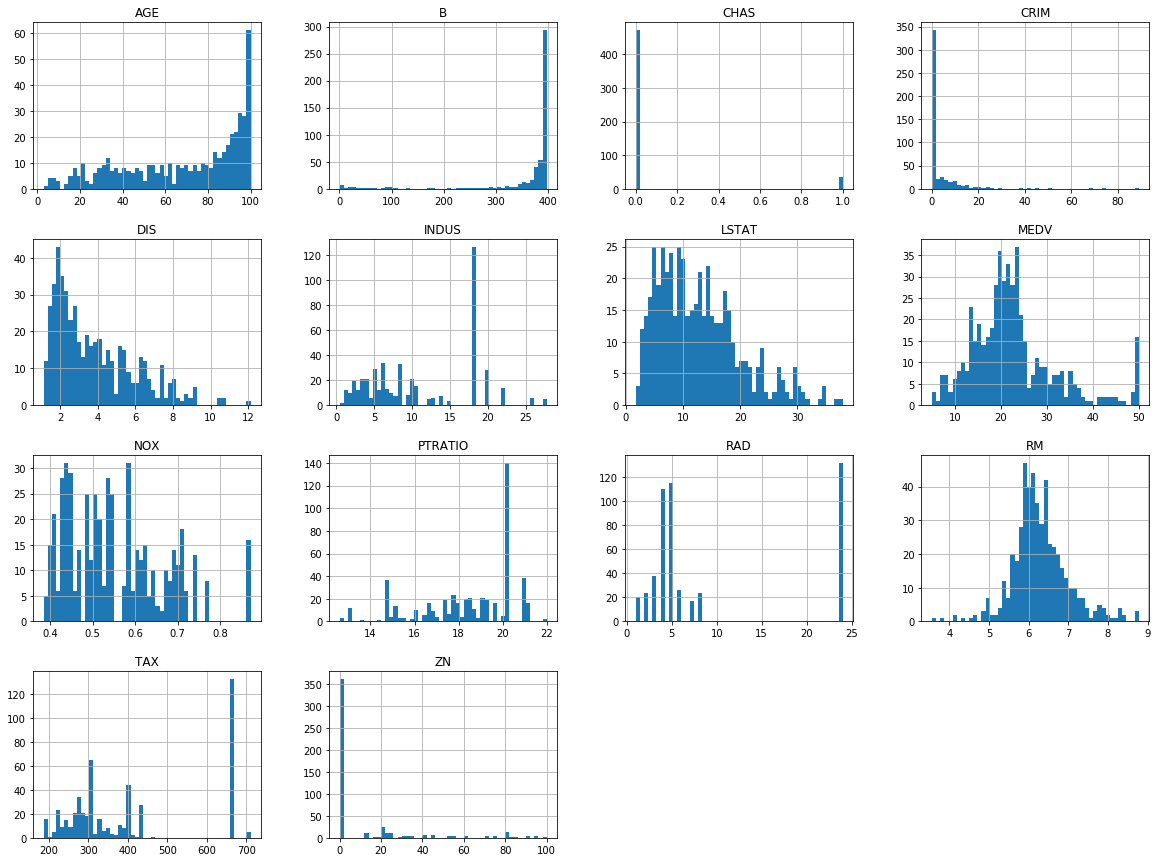

In [8]:
housing.hist(bins=50,figsize=[20,15])

## train-test Splitting 

In [12]:
#for learning perpose
# def split_train_test(data,test_retio):
#     np.random.seed(42)
#     shuffled=np.random.permutation(len(data))
#     test_set_size=int(len(data)*test_retio)
#     test_indices=shuffled[:test_set_size]
#     rain_indices=shuffled[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]
# split_train_test(housing,0.2)

In [6]:
#train_set,test_set=split_train_test(housing,0.2)
median=housing["CHAS"].median()
median

0.0

In [7]:
#print(f"Rows of train set:{len(train_set)}\n Rows in test set:{len(test_set)}\n")
housing["CHAS"].fillna(median)

0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Name: CHAS, Length: 506, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
print(f"Rows of train set:{len(train_set)}\n Rows in test set:{len(test_set)}\n")

Rows of train set:404
 Rows in test set:102



In [9]:
#def clean_dataset(df):
   # assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    #df.dropna(inplace=True)
    #indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    #return df[indices_to_keep].astype(np.float64)

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42 )
#housing.dropna(subset=["CHAS"]) 
#np.isnan(CHAS.any()) #and gets False
#np.isfinite(CHAS.all()) #and gets True
#np.any(np.isnan("CHAS"))
for train_index,test_index in split.split(housing,housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]
    

In [11]:
strat_test_set.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 341 to 219
Data columns (total 14 columns):
CRIM       95 non-null float64
ZN         100 non-null float64
INDUS      98 non-null float64
CHAS       102 non-null int64
NOX        102 non-null float64
RM         102 non-null float64
AGE        96 non-null float64
DIS        102 non-null float64
RAD        102 non-null int64
TAX        102 non-null int64
PTRATIO    102 non-null float64
B          102 non-null float64
LSTAT      99 non-null float64
MEDV       102 non-null float64
dtypes: float64(11), int64(3)
memory usage: 12.0 KB


In [12]:
housing= strat_train_set.copy()

##looking for correlation



##Looking for correlation

In [13]:
corr_matrix=housing.corr()

In [14]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.669448
ZN         0.391844
B          0.352618
DIS        0.255649
CHAS       0.180458
RAD       -0.365016
CRIM      -0.382804
AGE       -0.421495
NOX       -0.436721
TAX       -0.455906
PTRATIO   -0.463827
INDUS     -0.491957
LSTAT     -0.732270
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002227A0BC708>,
      dtype=object)

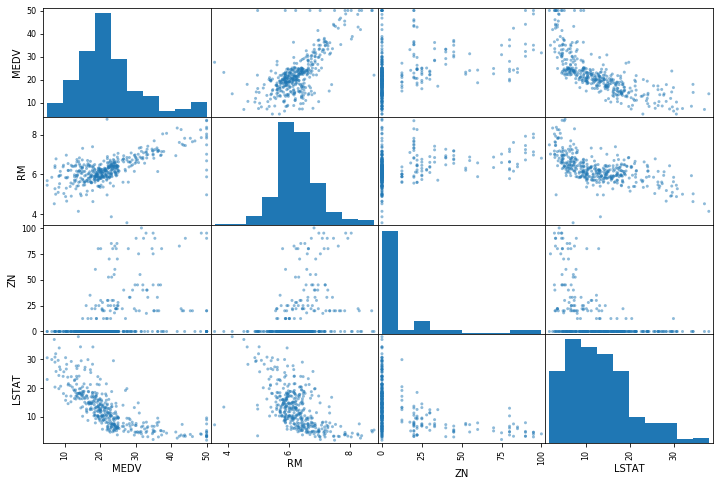

In [15]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes],figsize=(12,8))

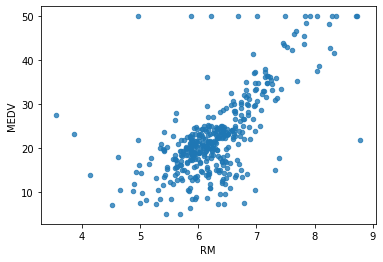

In [16]:
housing.plot(kind ="scatter",x="RM",y="MEDV",alpha=0.78)

##Trying out attribute combination

In [17]:
housing["TAXRM"]=housing['TAX']/housing['RM']

In [18]:
housing["TAXRM"]

425    112.957938
318     47.633971
41      34.416544
316     51.403449
431     97.468169
          ...    
100     57.083395
346     59.681248
484    113.438937
304     30.679934
392    132.247816
Name: TAXRM, Length: 404, dtype: float64

In [19]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
425,15.86030,0.0,18.10,0,0.679,5.896,95.4,1.9096,24,666,20.2,7.68,24.39,8.3,112.957938
318,0.40202,0.0,9.90,0,0.544,6.382,67.2,3.5325,4,304,18.4,395.21,10.36,23.1,47.633971
41,0.12744,0.0,6.91,0,0.448,6.770,2.9,5.7209,3,233,17.9,385.41,4.84,26.6,34.416544
316,0.31827,0.0,9.90,0,0.544,5.914,NaN,3.9986,4,304,18.4,390.70,18.33,17.8,51.403449
431,10.06230,0.0,18.10,0,0.584,6.833,94.3,2.0882,24,666,20.2,81.33,19.69,14.1,97.468169


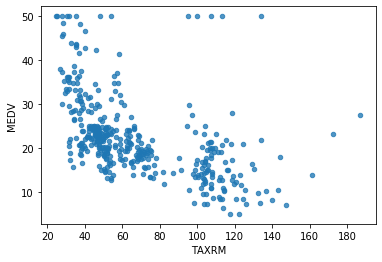

In [20]:
housing.plot(kind ="scatter",x="TAXRM",y="MEDV",alpha=0.78)

In [21]:
housing=strat_train_set.drop("MEDV",axis=1)
housing_labels=strat_train_set["MEDV"].copy()

#Missing attributes

In [22]:
# to take care missing attributes you have 3 options
#1.get rid of the missing data points
#2 get rid of the whole column
#3 set the values to some value( 0, mean or median) 

In [23]:
housing.dropna(subset=["RM"]) 
#1st option

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
425,15.86030,0.0,18.10,0,0.679,5.896,95.4,1.9096,24,666,20.2,7.68,24.39
318,0.40202,0.0,9.90,0,0.544,6.382,67.2,3.5325,4,304,18.4,395.21,10.36
41,0.12744,0.0,6.91,0,0.448,6.770,2.9,5.7209,3,233,17.9,385.41,4.84
316,0.31827,0.0,9.90,0,0.544,5.914,NaN,3.9986,4,304,18.4,390.70,18.33
431,10.06230,0.0,18.10,0,0.584,6.833,94.3,2.0882,24,666,20.2,81.33,19.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42
346,0.06162,0.0,4.39,0,0.442,5.898,52.3,8.0136,3,352,18.8,364.61,12.67
484,2.37857,0.0,18.10,0,0.583,5.871,41.9,3.7240,24,666,20.2,370.73,13.34
304,0.05515,33.0,2.18,0,0.472,7.236,41.1,4.0220,7,222,18.4,393.68,6.93


In [24]:
a= housing.dropna(subset=["RM"]) 
a.shape

(404, 13)

In [25]:
housing.drop("RM",axis=1).shape #2nd option

(404, 12)

In [26]:
median=housing["RM"].median() #3rd option
median

6.209

In [27]:
housing["RM"].fillna(median)

425    5.896
318    6.382
41     6.770
316    5.914
431    6.833
       ...  
100    6.727
346    5.898
484    5.871
304    7.236
392    5.036
Name: RM, Length: 404, dtype: float64

In [28]:
housing.shape

(404, 13)

In [29]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [30]:
imputer.statistics_

array([2.83920e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.77500e+01, 3.10730e+00, 5.00000e+00, 3.41000e+02,
       1.91000e+01, 3.90975e+02, 1.17400e+01])

In [31]:
x=imputer.transform(housing)

In [32]:
housing_tr=pd.DataFrame(x,columns=housing.columns)
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.699779,10.382426,11.232599,0.066832,0.557777,6.280760,69.876238,3.745757,9.745050,411.539604,18.489109,353.730421,12.839381
std,9.194859,22.608913,6.671452,0.250040,0.116376,0.702466,27.166717,2.095471,8.723025,168.190814,2.135190,95.032131,7.066410
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.091487,0.000000,5.725000,0.000000,0.453000,5.878750,47.350000,2.042200,4.000000,283.250000,17.400000,374.650000,7.215000
50%,0.283920,0.000000,9.900000,0.000000,0.538000,6.209000,77.750000,3.107300,5.000000,341.000000,19.100000,390.975000,11.740000
75%,3.489463,0.000000,18.100000,0.000000,0.625750,6.620500,94.025000,5.100400,24.000000,666.000000,20.200000,395.945000,16.945000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


##skleran design

Primerly 3 types of object
1. Estimators = its estimate some parameters based on dataset  eg. imputer. it has a fit mathod or transform mathod. fit method= fit the dataset and calculate the parameters 

2. Transformers= takes input and return output based on the learning from fit().it also have a convenience function called fit_tranform , which fits and transforms.

 3. Predictors= Linear regerration model is an example of predictor.fit()and predict() are two comman functions. also gives score() function which will evaluate the predictions. 


## F eatures Scalling

Primarily two typts of features scalling
1. Min-max scalling(Normalization)
    = (values-min)/(max-min)
       sklearn provide a class called MinMaxScalerfor this
2. Standardization=
    (value-mean)/(Std)
     sklearn provides a class called Standard Scaler for this 

## Creating Pipeline

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler()),
])


In [34]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [35]:
housing_num_tr

array([[ 1.32417465, -0.45978766,  1.03064757, ...,  0.80227627,
        -3.64591946,  1.63660765],
       [-0.35909713, -0.45978766, -0.19999414, ..., -0.04178522,
         0.43702072, -0.35130362],
       [-0.3889965 , -0.45978766, -0.64872813, ..., -0.27624675,
         0.33376984, -1.13343265],
       ...,
       [-0.14386809, -0.45978766,  1.03064757, ...,  0.80227627,
         0.17910424,  0.0709327 ],
       [-0.39686825,  1.0016235 , -1.35859829, ..., -0.04178522,
         0.42090094, -0.83730046],
       [ 0.85785866, -0.45978766,  1.03064757, ...,  0.80227627,
         0.45482623,  1.8193878 ]])

In [36]:
housing_num_tr.shape

(404, 13)

##Slecting a desired model for project

## Slecting a desired model for M.L.project

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model=LinearRegression()
#model=DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [38]:
some_data=housing.iloc[:5]

In [39]:
some_labels=housing_labels.iloc[:5]

In [40]:
prepared_data=my_pipeline.transform(some_data)

In [41]:
model.predict(prepared_data)

array([ 8.43, 23.1 , 28.96, 17.64, 16.41])

In [42]:
list(some_labels)

[8.3, 23.1, 26.6, 17.8, 14.1]

## Evaluating the model

In [44]:
from sklearn.metrics import mean_squared_error
housing_prediction=model.predict(housing_num_tr)
mse=mean_squared_error(housing_labels,housing_prediction)
rmse=np.sqrt(mse)

In [45]:
rmse

1.579622009554598

## Using better evaluation techniques - Cross validation 

In [46]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

In [47]:
rmse_scores


array([4.95775913, 3.75319051, 2.31188921, 3.09502315, 6.91776626,
       3.23473917, 2.75073081, 3.82736659, 3.32860894, 3.00876885])

In [48]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard Deviation:",scores.std())

In [49]:
print_scores(rmse_scores)

Scores: [4.95775913 3.75319051 2.31188921 3.09502315 6.91776626 3.23473917
 2.75073081 3.82736659 3.32860894 3.00876885]
Mean: 3.71858426242452
Standard Deviation: 1.2640306747319572


## Saving the model

In [51]:
from joblib import dump,load

dump(model,'MLproject.joblib')

['MLproject.joblib']

## Testing the model on test data

In [55]:
X_test=strat_test_set.drop("MEDV",axis=1)
Y_test=strat_test_set["MEDV"].copy()
X_test_prepared=my_pipeline.transform(X_test)
final_predictions=model.predict(X_test_prepared)
final_mse=mean_squared_error(Y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
print(final_predictions,list(Y_test))

[33.56  8.17 21.26 29.2  20.84 15.72 21.12 15.94 34.99 31.77 19.02 10.55
 19.91 13.17 20.42 11.97 34.29 14.81 20.32 26.81 20.25 18.09  9.51 23.77
 19.66 22.61 17.2  28.39  7.87 32.55 22.25 21.09 19.33 11.96 20.46 15.73
 32.97 25.36 21.28 20.08 20.29 44.97 19.92 22.   20.71 24.35 34.24 20.08
 20.02 19.28 20.81 14.18 23.27 19.57 24.67 21.88 47.87 29.52 18.21 20.56
 27.99  8.59 21.33 42.52 14.51 34.34 46.47 18.96 19.93 30.46 45.65 23.23
 31.1  24.64 47.73 13.94 17.94 22.41 24.51 24.33 22.78 20.65 12.71 23.26
 21.52 20.61 10.16 22.19 20.46 23.35 18.74 26.2  12.55 24.2  16.79 35.97
 19.15 32.07 14.17 26.81 22.06 20.57] [32.7, 13.1, 28.7, 26.7, 14.4, 15.6, 19.4, 12.6, 33.3, 32.4, 23.1, 13.8, 22.6, 11.9, 21.1, 11.3, 35.4, 13.5, 21.0, 27.5, 19.2, 19.5, 10.2, 29.4, 18.6, 24.8, 15.2, 24.4, 8.8, 30.3, 22.0, 20.6, 23.1, 13.3, 23.8, 13.8, 33.8, 24.7, 19.4, 20.9, 22.5, 48.8, 22.7, 23.4, 19.5, 26.4, 31.7, 19.0, 19.9, 18.2, 21.2, 13.6, 27.1, 21.7, 28.6, 24.0, 44.8, 31.1, 18.9, 20.4, 29.1, 5.6, 17.5, 3

In [53]:
final_rmse

2.8428641315736907

In [56]:
model.predict(prepared_data)


array([ 8.43, 23.1 , 28.96, 17.64, 16.41])

In [58]:
prepared_data[0]

array([ 1.32417465, -0.45978766,  1.03064757, -0.26761547,  1.04294482,
       -0.54840649,  0.94068819, -0.87733702,  1.63620137,  1.51480276,
        0.80227627, -3.64591946,  1.63660765])

## Using the model

In [59]:
from joblib import dump,load
import numpy as np
model=load('MLproject.joblib')
features=np.array([[ 1.32417465, -0.45978766,  1.03064757, -0.26761547,  1.04294482,
       -0.54840649,  0.94068819, -0.87733702,  1.63620137,  1.51480276,
        0.80227627, -3.64591946,  1.63660765]])
model.predict(features)

array([8.43])